# Predicting House Prices 



In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as st
import seaborn as sns
import warnings

%matplotlib inline

pd.options.display.max_columns = None
warnings.filterwarnings('ignore')
color = sns.color_palette()
sns.set_style('darkgrid')

# Importing the train and test datasets in pandas dataframes
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Drop the 'Id' column from the train dataframe
train_data.drop(columns='Id', inplace=True)

y_train = train_data['SalePrice']

In [2]:
# The shape of the data
train_data.shape, test_data.shape, y_train.shape

((1460, 80), (1459, 80), (1460,))

In [3]:
# Display the first five rows of the training dataset.
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# The description of the train dataset
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Looking the type of the columns in the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## 03) Finding Correlation Features

In [6]:
# Showing the numerical varibales with the highest correlation with 'SalePrice', sorted from highest to lowest
correlation = train_data.select_dtypes(include=[np.number]).corr()

print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


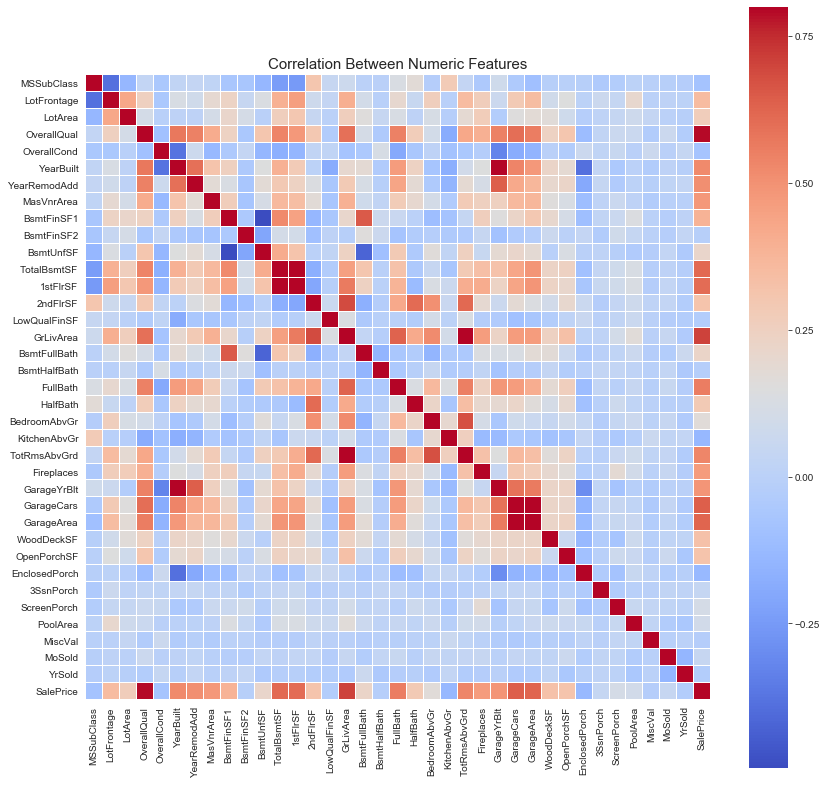

In [7]:
# Heatmap of correlation of numeric features
fig, ax = plt.subplots(figsize = (14,14))

plt.title('Correlation Between Numeric Features', size=15)
sns.heatmap(correlation, square=True, vmax=0.8, cmap='coolwarm', linewidths=0.01);

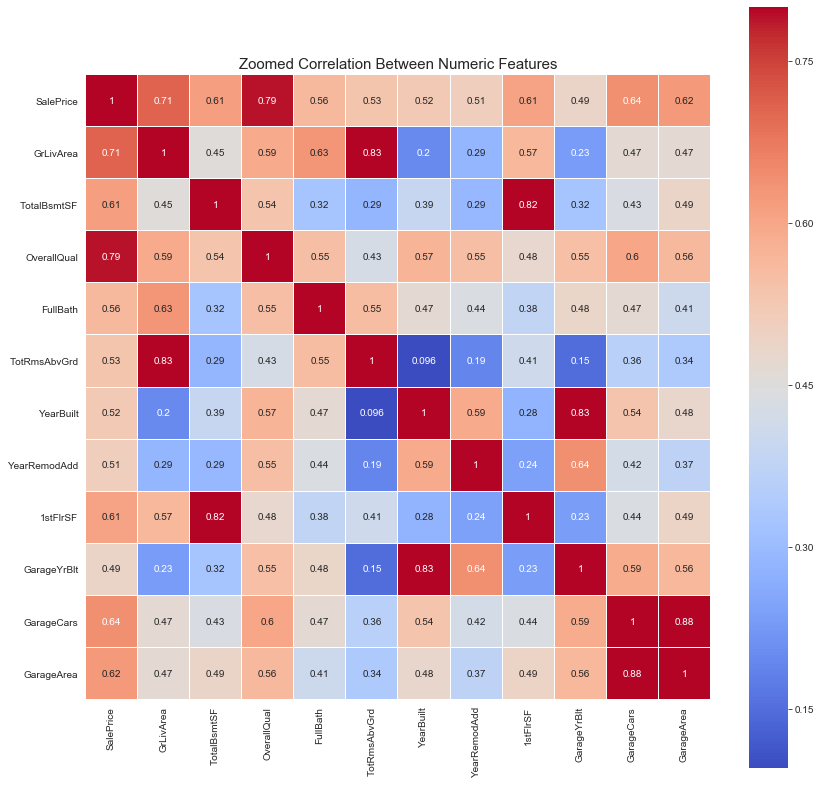

In [8]:
# Zoomed HeatMap of the most Correlayed variables
zoomed_correlation = correlation.loc[['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','FullBath','TotRmsAbvGrd','YearBuilt', 'YearRemodAdd', '1stFlrSF','GarageYrBlt','GarageCars','GarageArea'],
                                     ['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','FullBath','TotRmsAbvGrd','YearBuilt', 'YearRemodAdd', '1stFlrSF','GarageYrBlt','GarageCars','GarageArea']]

fig , ax = plt.subplots(figsize = (14,14))
plt.title('Zoomed Correlation Between Numeric Features', size=15)
sns.heatmap(zoomed_correlation, square=True, vmax=0.8, annot=True, cmap='coolwarm', linewidths=0.01);

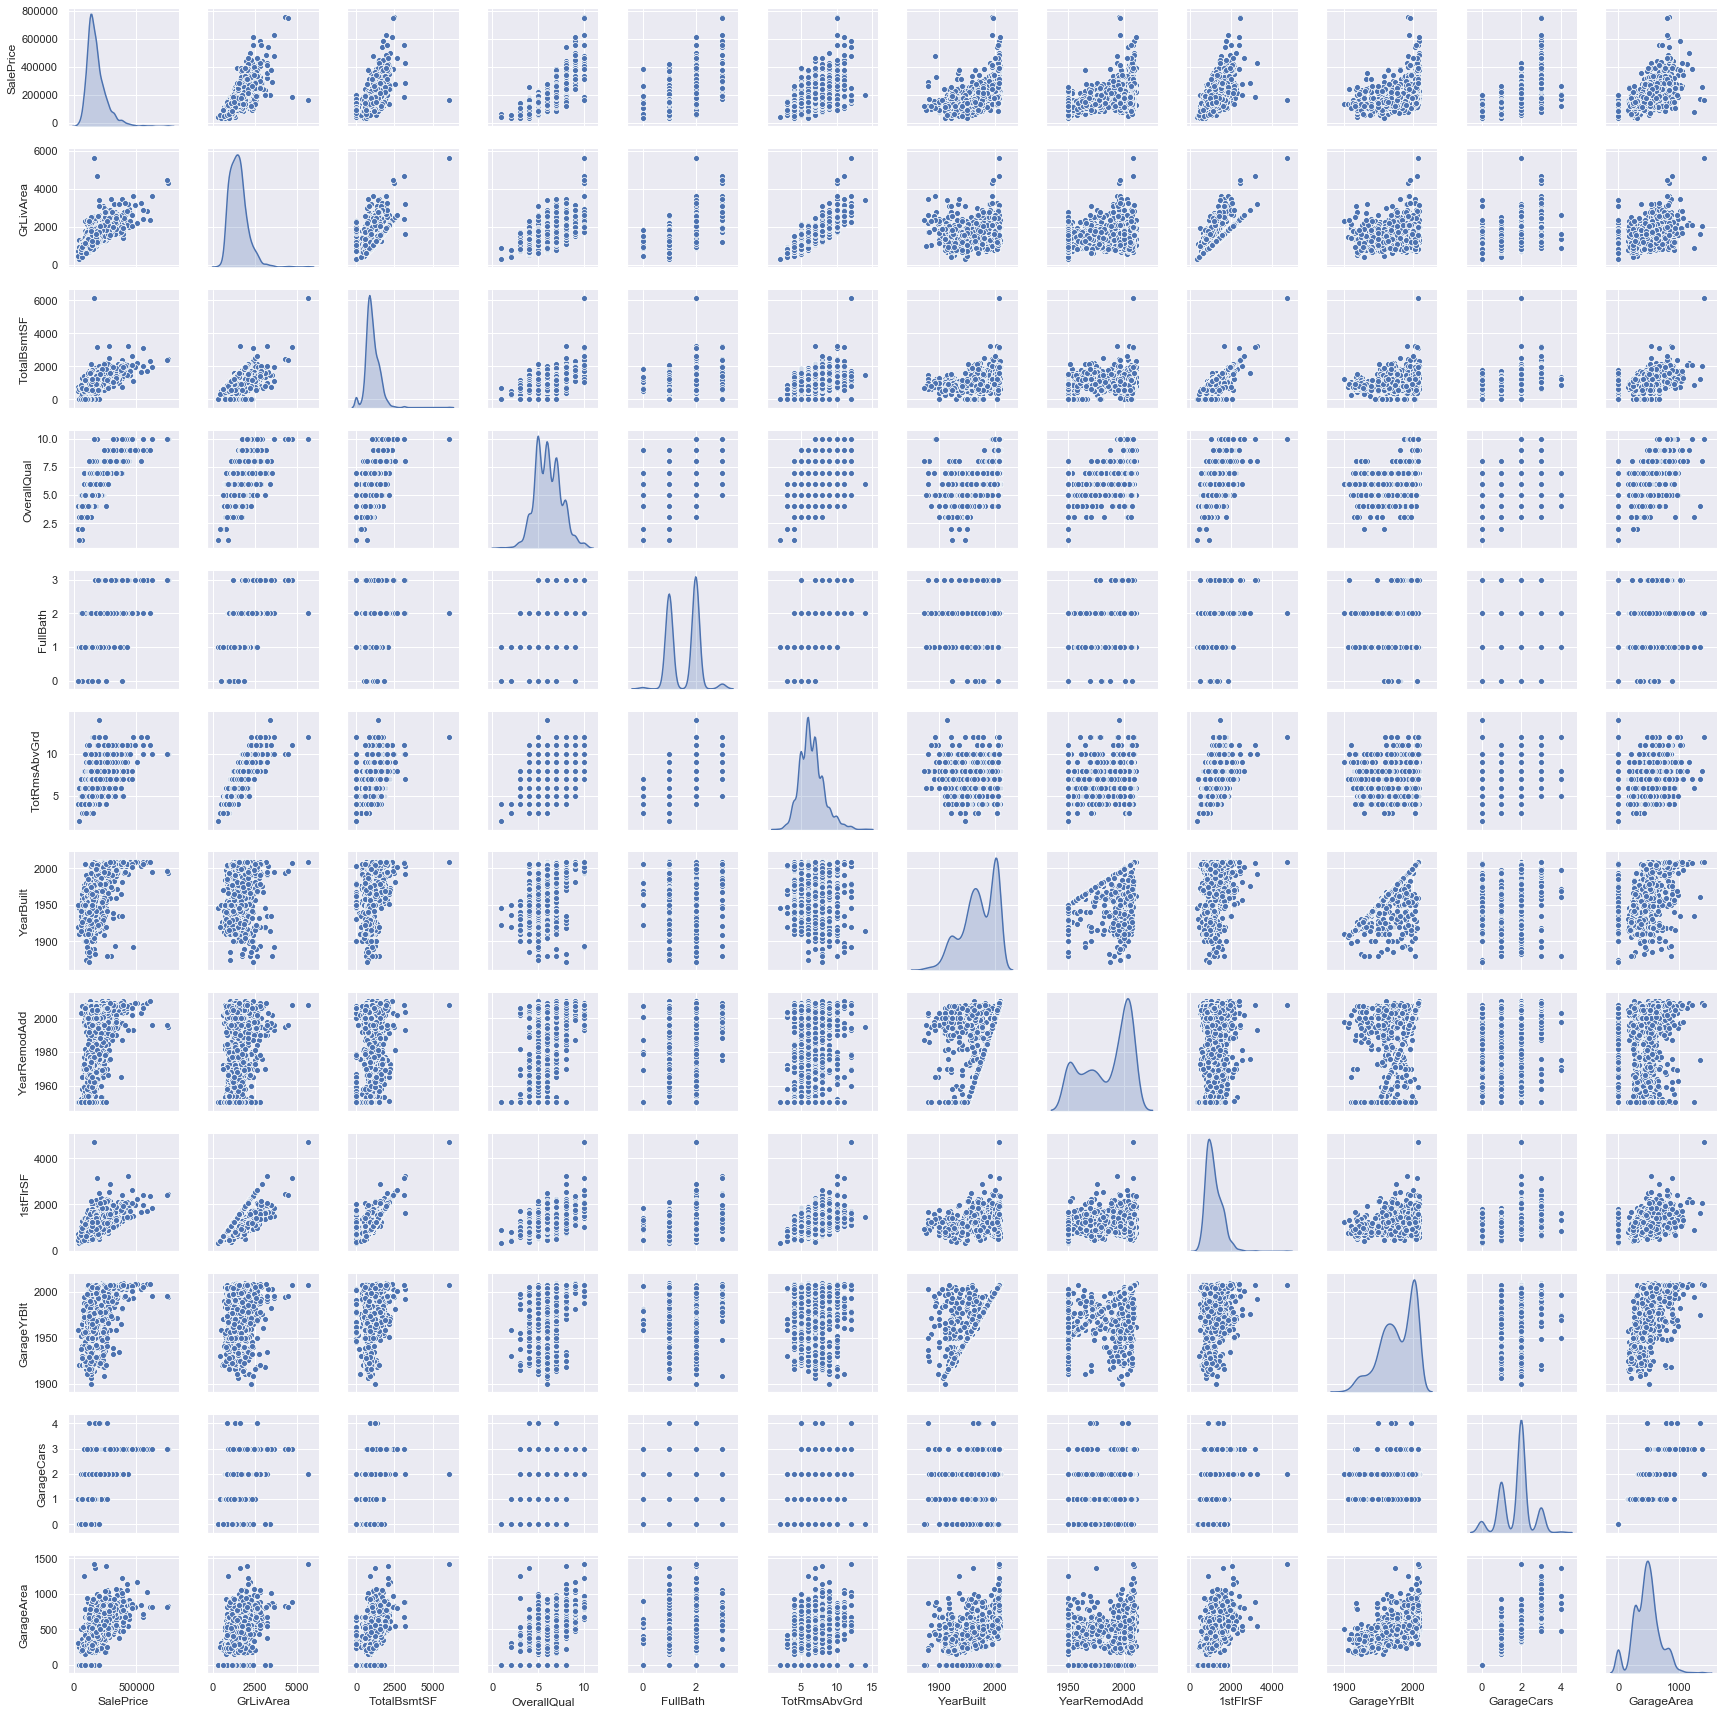

In [9]:
# Pair plot
cols = ['SalePrice','GrLivArea','TotalBsmtSF','OverallQual','FullBath','TotRmsAbvGrd','YearBuilt', 'YearRemodAdd', '1stFlrSF','GarageYrBlt','GarageCars','GarageArea']

sns.set()
sns.pairplot(train_data[cols], size=2, kind='scatter', diag_kind='kde');

## 04) Removing Outliers


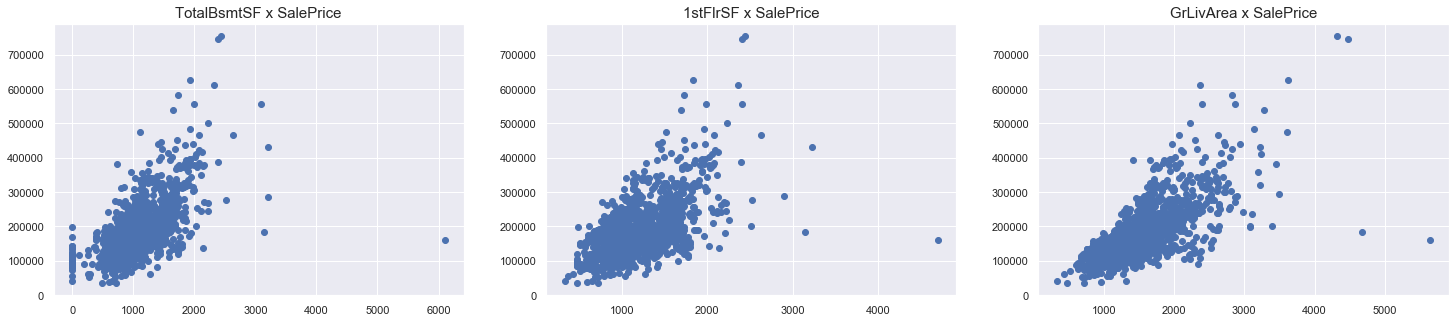

In [10]:
plt.figure(figsize=(25,5))

ax1 = plt.subplot(1, 3, 1)
plt.scatter(x=train_data.TotalBsmtSF, y=train_data.SalePrice)
plt.title('TotalBsmtSF x SalePrice', size=15)

ax2 = plt.subplot(1, 3, 2)
plt.scatter(x=train_data['1stFlrSF'], y=train_data.SalePrice)
plt.title('1stFlrSF x SalePrice', size=15)

ax3 = plt.subplot(1, 3, 3)
plt.scatter(x = train_data.GrLivArea, y=train_data.SalePrice)
plt.title('GrLivArea x SalePrice', size=15)

plt.show()

In [11]:
print(train_data.shape)

# Removing the four outliers found 
train_data.drop(train_data[train_data['TotalBsmtSF'] > 5000].index, inplace=True)
train_data.drop(train_data[train_data['1stFlrSF'] > 4000].index,inplace=True)
train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index, inplace = True)

print(train_data.shape)

(1460, 80)
(1458, 80)


## 05) Imputation of Missing Values


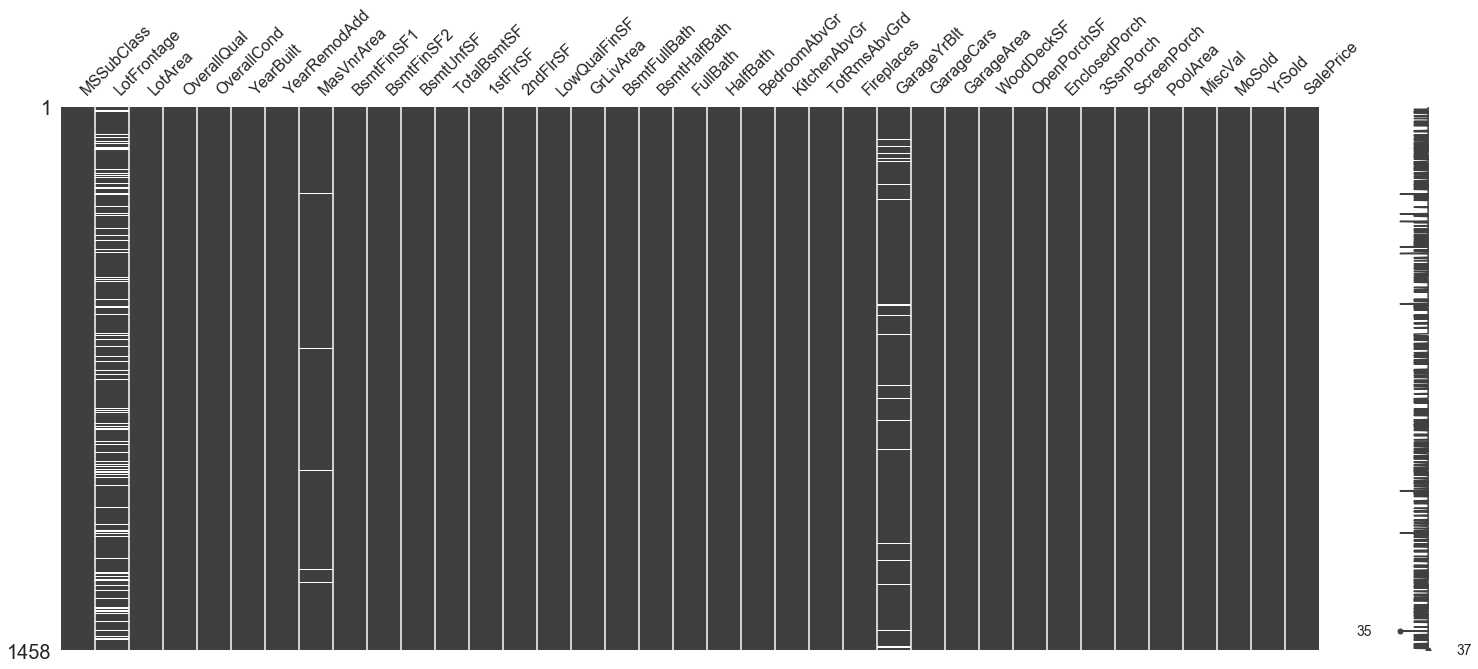

In [12]:
# Visualising missing values of numeric features
msno.matrix(train_data.select_dtypes(include=[np.number]));

In [13]:
# Visualising percentage of missing values of the top 5 numeric variables
total = train_data.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)
percent = (train_data.select_dtypes(include=[np.number]).isnull().sum() / train_data.select_dtypes(include=[np.number]).isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, join='outer', keys=['Missing Count', 'Missing Percentage'])
missing_data.index.name=' Numeric Feature'
missing_data.head(5)

,Missing Count,Missing Percentage
Numeric Feature,,
LotFrontage,259,0.177641
GarageYrBlt,81,0.055556
MasVnrArea,8,0.005487
SalePrice,0,0.000000
BsmtUnfSF,0,0.000000


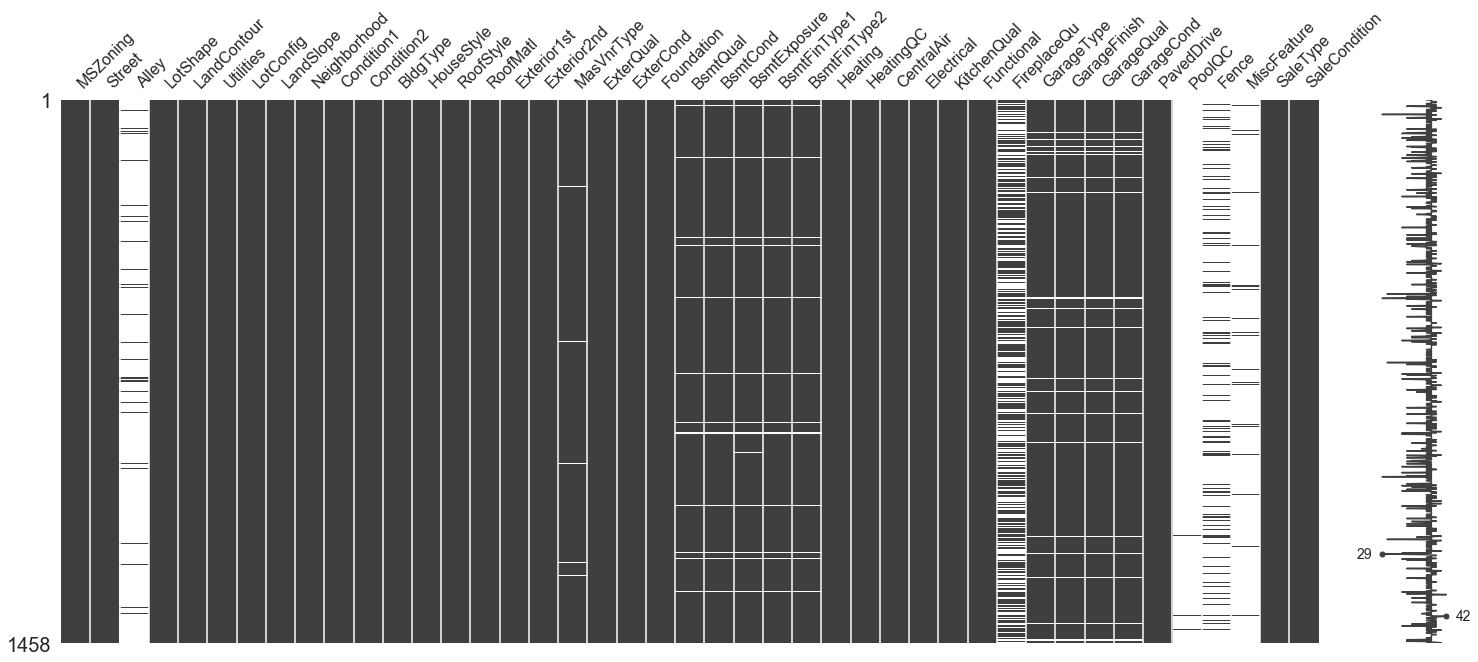

In [14]:
# Visualising missing values of categorical features
msno.matrix(train_data.select_dtypes(include=[np.object]));

In [15]:
# Visualising percentage of missing values of the top 10 categorical variables
total = train_data.select_dtypes(include=[np.object]).isnull().sum().sort_values(ascending=False)
percent = (train_data.select_dtypes(include=[np.object]).isnull().sum() / train_data.select_dtypes(include=[np.object]).isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Missing Count', 'Missing Percentage'])
missing_data.index.name =' Object Feature'
missing_data.head(20)

,Missing Count,Missing Percentage
Object Feature,,
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
GarageCond,81,0.055556
GarageQual,81,0.055556
GarageFinish,81,0.055556
GarageType,81,0.055556


We observe that `PoolQC`, `MiscFeature`, `Alley`, `Fence` and `FireplaceQu` have a significant amount of missing values.

In [16]:
# Concatenate the training and test datasets into a single dataframe
data_full = pd.concat([train_data,test_data], ignore_index=True)
data_full.drop('Id', axis=1, inplace=True)

data_full.shape

(2917, 80)

In [17]:
# Sum of missing values by numeric features
sum_missing_values = data_full.select_dtypes(include=[np.number]).isnull().sum()

sum_missing_values[sum_missing_values > 0].sort_values(ascending=False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
GarageCars         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [18]:
# Numeric features with small number of NaNs: replace with 0
for col in ['BsmtHalfBath', 'BsmtFullBath', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']:
    data_full[col].fillna(0, inplace=True)

# Check if missing values are imputed successfully
sum_missing_values = data_full.select_dtypes(include=[np.number]).isnull().sum()
sum_missing_values[sum_missing_values > 0].sort_values(ascending=False)

SalePrice      1459
LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
dtype: int64

In [19]:
# Numeric features with medium number of NaNs: replace with the mean
data_full['MasVnrArea'].fillna(data_full['MasVnrArea'].mean(), inplace=True)

# Check if missing values are imputed successfully
sum_missing_values = data_full.select_dtypes(include=[np.number]).isnull().sum()
sum_missing_values[sum_missing_values > 0].sort_values(ascending=False)

SalePrice      1459
LotFrontage     486
GarageYrBlt     159
dtype: int64

In [20]:
# Cut 'YearBuilt' into 10 parts
data_full['YearBuiltCut'] = pd.qcut(data_full['YearBuilt'], 10)

# Impute the missing values of 'GarageYrBlt' based on the median of 'YearBuilt' 
data_full['GarageYrBlt'] = data_full.groupby(['YearBuiltCut'])['GarageYrBlt'].transform(lambda x : x.fillna(x.median()))

# Convert the values to integers
data_full['GarageYrBlt'] = data_full['GarageYrBlt'].astype(int)

# Drop 'YearBuiltCut' column
data_full.drop('YearBuiltCut', axis=1, inplace=True)

# Check if missing values are imputed successfully
sum_missing_values = data_full.select_dtypes(include=[np.number]).isnull().sum()
sum_missing_values[sum_missing_values > 0].sort_values(ascending=False)

SalePrice      1459
LotFrontage     486
dtype: int64

In [21]:
# Cut 'LotArea' into 10 parts
data_full['LotAreaCut'] = pd.qcut(data_full['LotArea'], 10)

# Impute the missing values of 'LotFrontage' based on the median of 'LotArea' and 'Neighborhood'
data_full['LotFrontage'] = data_full.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))
data_full['LotFrontage'] = data_full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))

# Drop 'LotAreaCut' column
data_full.drop('LotAreaCut',axis=1,inplace=True)

# Check if missing values are imputed successfully
sum_missing_values = data_full.select_dtypes(include=[np.number]).isnull().sum()
sum_missing_values[sum_missing_values > 0].sort_values(ascending=False)

SalePrice    1459
dtype: int64

In [22]:
# Sum of missing values by feature (object)
sum_missing_values = data_full.select_dtypes(include=[np.object]).isnull().sum()
sum_missing_values[sum_missing_values > 0].sort_values(ascending=False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Utilities          2
Functional         2
Electrical         1
Exterior1st        1
Exterior2nd        1
SaleType           1
KitchenQual        1
dtype: int64

In [23]:
# Categorical features with less than 5 missing values: replace with the mode (most frequently occured value)
for col in ['MSZoning', 'Functional', 'Utilities', 'Exterior1st', 'SaleType', 'Exterior2nd', 'KitchenQual', 'Electrical']:
    data_full[col].fillna(data_full[col].mode()[0], inplace=True)

# Check if missing values are imputed successfully
sum_missing_values = data_full.select_dtypes(include=[np.object]).isnull().sum()
sum_missing_values[sum_missing_values > 0].sort_values(ascending=False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
dtype: int64

In [24]:
# Categorical features with more than 5 missing values: replace with 'None'
for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType']:
    data_full[col].fillna('None', inplace=True)

# Check if missing values are imputed successfully
sum_missing_values = data_full.select_dtypes(include=[np.object]).isnull().sum()
sum_missing_values[sum_missing_values > 0].sort_values(ascending=False)

Series([], dtype: int64)

## 06) Correcting Features


In [25]:
data_full.select_dtypes(include=[np.number]).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [26]:
# Converting numeric features to categorical features
str_cols = ['YrSold','YearRemodAdd','YearBuilt','MoSold','MSSubClass','GarageYrBlt']

for col in str_cols:
    data_full[col] = data_full[col].astype(str)

## 07) Adding Features


In [27]:
data_full.select_dtypes(include=[np.object]).columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MoSold', 'Neighborhood', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [28]:
data_full['GarageCond'].unique()

array(['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], dtype=object)

In [29]:
# ExterQual = Evaluates the quality of the material on the exterior: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor)
data_full["oExterQual"] = data_full['ExterQual'].map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

# ExterCond = Evaluates the present condition of the material on the exterior: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor)
data_full["oExterCond"] = data_full['ExterCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# BsmtQual = Evaluates the height of the basement: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor), NA(No Basement)
data_full["oBsmtQual"] = data_full['BsmtQual'].map({'None':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# BsmtExposure = Refers to walkout or garden level walls: Gd(Good), Av(Average), Mn(Minimum), No(No Exposure), NA(No Basement)
data_full["oBsmtExposure"] = data_full['BsmtExposure'].map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})

# BsmtCond = Evaluates the general condition of the basement: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor), NA(No Basement)
data_full["oBsmtCond"] = data_full['BsmtCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':3, 'Gd':4})

# HeatingQC = Heating quality and condition: Ex(Excellent), Gd(Good), TA(Average), Fa(Fair), Po(Poor)
data_full["oHeatingQC"] = data_full['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# KitchenQual: Kitchen quality: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor)
data_full["oKitchenQual"] = data_full['KitchenQual'].map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

# FireplaceQu: Fireplace quality: Ex(Excellent), Gd(Good), TA(Average), Fa(Fair), Po(Poor), NA(No Fireplace)
data_full["oFireplaceQu"] = data_full['FireplaceQu'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

# GarageFinish: Interior finish of the garage: Fin(Finished), RFn(Rough Finished), Unf(Unfinished), NA(No Garage)
data_full["oGarageFinish"] = data_full['GarageFinish'].map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})

# GarageQual: Garage quality: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor), NA(No Garage)
data_full["oGarageQual"] = data_full['GarageQual'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

# GarageCond: Garage condition: Ex(Excellent), Gd(Good), TA(Typical), Fa(Fair), Po(Poor), NA(No Garage)
data_full["oGarageCond"] = data_full['GarageCond'].map({'None':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

# PavedDrive: Paved driveway: Y(Padev), P(Partial Pavement), N(Dirt)
data_full["oPavedDrive"] = data_full['PavedDrive'].map({'N':1, 'P':2, 'Y':3})

In [30]:
data_full.select_dtypes(include=[np.number]).columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'oExterQual', 'oExterCond', 'oBsmtQual',
       'oBsmtExposure', 'oBsmtCond', 'oHeatingQC', 'oKitchenQual',
       'oFireplaceQu', 'oGarageFinish', 'oGarageQual', 'oGarageCond',
       'oPavedDrive'],
      dtype='object')

In [31]:
# House square feet = First floor square feet + Second floor square feet + Total square feet of basement area
data_full['HouseSF'] = data_full['1stFlrSF'] + data_full['2ndFlrSF'] + data_full['TotalBsmtSF']

# Porch square feet = Three season porch area in square feet + Enclosed porch area in square feet + Screen porch area in square feet
data_full['PorchSF'] = data_full['3SsnPorch'] + data_full['EnclosedPorch'] + data_full['OpenPorchSF'] + data_full['ScreenPorch']

# Total square feet = House square feet + Porch square feet + Garage area
data_full['TotalSF'] = data_full['HouseSF'] + data_full['PorchSF'] + data_full['GarageArea']

## 08) Skewness and Kurtosis


In [32]:
# Estimate Skewness of the data
train_data.skew()

MSSubClass        1.407011
LotFrontage       1.543043
LotArea          12.573925
OverallQual       0.200786
OverallCond       0.691035
YearBuilt        -0.612295
YearRemodAdd     -0.501838
MasVnrArea        2.687784
BsmtFinSF1        0.764789
BsmtFinSF2        4.251925
BsmtUnfSF         0.920903
TotalBsmtSF       0.511703
1stFlrSF          0.887637
2ndFlrSF          0.812957
LowQualFinSF      9.004955
GrLivArea         1.010992
BsmtFullBath      0.590358
BsmtHalfBath      4.100114
FullBath          0.031271
HalfBath          0.680051
BedroomAbvGr      0.212325
KitchenAbvGr      4.484883
TotRmsAbvGrd      0.660502
Fireplaces        0.632060
GarageYrBlt      -0.648137
GarageCars       -0.342377
GarageArea        0.131748
WoodDeckSF        1.545805
OpenPorchSF       2.339829
EnclosedPorch     3.087164
3SsnPorch        10.297106
ScreenPorch       4.118929
PoolArea         15.948945
MiscVal          24.460085
MoSold            0.215432
YrSold            0.095420
SalePrice         1.881296
d

In [33]:
# Estimate Kurtosis of the data
train_data.kurt()

MSSubClass         1.574553
LotFrontage       11.529536
LotArea          213.590680
OverallQual        0.074960
OverallCond        1.101740
YearBuilt         -0.439826
YearRemodAdd      -1.273920
MasVnrArea        10.358240
BsmtFinSF1        -0.112098
BsmtFinSF2        20.080289
BsmtUnfSF          0.473872
TotalBsmtSF        1.770105
1stFlrSF           1.117385
2ndFlrSF          -0.557022
LowQualFinSF      83.114539
GrLivArea          2.063463
BsmtFullBath      -0.864212
BsmtHalfBath      16.367797
FullBath          -0.869968
HalfBath          -1.070134
BedroomAbvGr       2.224291
KitchenAbvGr      21.496687
TotRmsAbvGrd       0.857578
Fireplaces        -0.290840
GarageYrBlt       -0.418933
GarageCars         0.222108
GarageArea         0.761293
WoodDeckSF         3.005930
OpenPorchSF        8.476318
EnclosedPorch     10.411046
3SsnPorch        123.487560
ScreenPorch       18.407948
PoolArea         257.748720
MiscVal          700.045287
MoSold            -0.400289
YrSold            -1

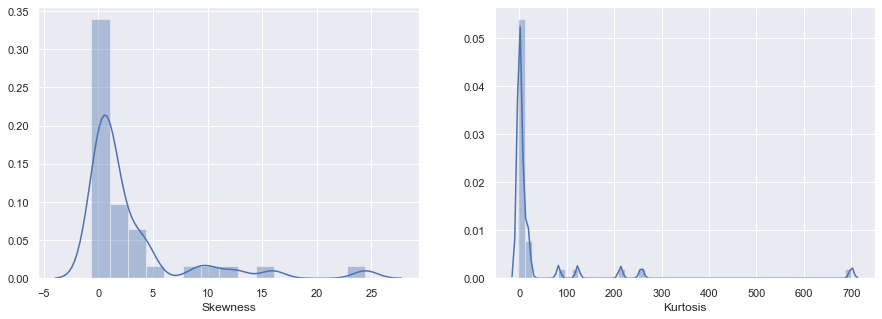

In [34]:
# Plot the Skewness and Kurtosis of the data
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1, 2, 1)
sns.distplot(train_data.skew(), axlabel ='Skewness')

ax2 = plt.subplot(1, 2, 2)
sns.distplot(train_data.kurt(), axlabel ='Kurtosis')

plt.show()

## 09) Label Encoding



In [35]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import skew

# Label encoding class
class labenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        label = LabelEncoder()
        
        X['YrSold'] = label.fit_transform(X['YrSold'])
        X['YearRemodAdd'] = label.fit_transform(X['YearRemodAdd'])
        X['YearBuilt'] = label.fit_transform(X['YearBuilt'])
        X['MoSold'] = label.fit_transform(X['MoSold'])
        X['GarageYrBlt'] = label.fit_transform(X['GarageYrBlt'])
        
        return X
    
# Skewness transform class
class skewness(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        skewness = X.select_dtypes(include=[np.number]).apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= 1].index
        
        X[skewness_features] = np.log1p(X[skewness_features])
        
        return X

# One hot encoding class
class onehotenc(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = pd.get_dummies(X)
        
        return X

In [36]:
# Creating a copy of the full dataset
data_full_copy = data_full.copy()

# Creating a new data with the applied transformations using a Pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('labenc', labenc()), ('skewness', skewness()), ('onehotenc', onehotenc())])

data_pipeline = pipeline.fit_transform(data_full_copy)

data_full.shape, data_pipeline.shape

((2917, 95), (2917, 332))

In [37]:
data_full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,oExterQual,oExterCond,oBsmtQual,oBsmtExposure,oBsmtCond,oHeatingQC,oKitchenQual,oFireplaceQu,oGarageFinish,oGarageQual,oGarageCond,oPavedDrive,HouseSF,PorchSF,TotalSF
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,None,0,2,CollgCr,61,5,7,Y,0,None,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,3,3,4,2,3,5,3,1,3,4,4,3,2566.0,61,3175.0
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,None,0,5,Veenker,0,8,6,Y,0,None,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,2,3,4,4,3,5,2,4,3,4,4,3,2524.0,0,2984.0
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,None,0,9,CollgCr,42,5,7,Y,0,None,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,3,3,4,3,3,5,3,4,3,4,4,3,2706.0,42,3356.0
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,None,0,2,Crawfor,35,5,7,Y,0,None,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,2,3,3,2,4,4,3,5,2,4,4,3,2473.0,307,3422.0
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,None,0,12,NoRidge,84,5,8,Y,0,None,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,3,3,4,3,3,5,3,4,3,4,4,3,3343.0,84,4263.0


In [38]:
data_pipeline.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,oExterQual,oExterCond,oBsmtQual,oBsmtExposure,oBsmtCond,oHeatingQC,oKitchenQual,oFireplaceQu,oGarageFinish,oGarageQual,oGarageCond,oPavedDrive,HouseSF,PorchSF,TotalSF,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborho

In [39]:
X_train = data_pipeline[:train_data.shape[0]]
y_train = X_train['SalePrice']
X_train.drop(columns='SalePrice', inplace=True)

X_test = data_pipeline[train_data.shape[0]:]
X_test.drop(columns='SalePrice', inplace=True)

X_train.shape, y_train.shape, X_test.shape

((1458, 331), (1458,), (1459, 331))

## 10) Transformation and Scaling

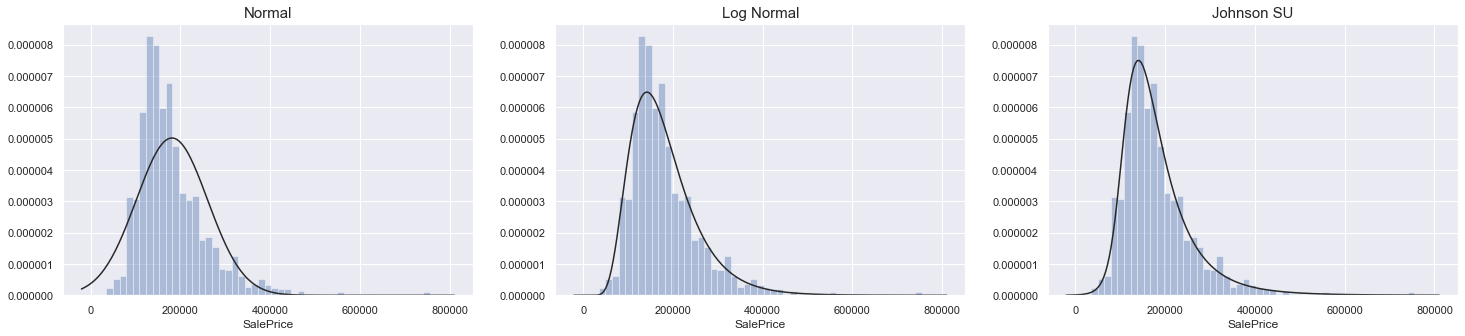

In [40]:
plt.figure(figsize=(25,5))

ax1 = plt.subplot(1, 3, 1)
sns.distplot(y_train, kde=False, fit=st.norm)
plt.title('Normal', size = 15)

ax2 = plt.subplot(1, 3, 2)
sns.distplot(y_train, kde=False, fit=st.lognorm)
plt.title('Log Normal', size = 15)

ax3 = plt.subplot(1, 3, 3)
sns.distplot(y_train, kde=False, fit=st.johnsonsu)
plt.title('Johnson SU', size = 15)

plt.show()

In [41]:
# Transforming 'SalePrice' into normal distribution
y_train_transformed = np.log(y_train)

y_train_transformed.skew(), y_train_transformed.kurt()

(0.12156821443518166, 0.8047636129011364)

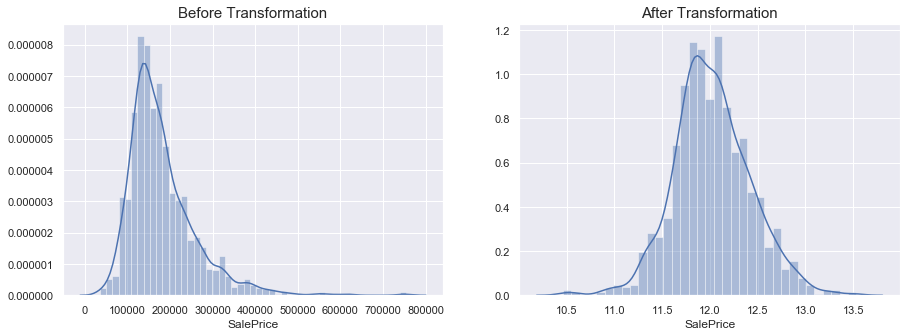

In [42]:
# Plotting 'SalePrice' before and after the transformation
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1, 2, 1)
sns.distplot(y_train)
plt.title('Before Transformation', size=15)

ax2 = plt.subplot(1, 2, 2)
sns.distplot(y_train_transformed)
plt.title('After Transformation', size=15)

plt.show()

In [43]:
# Using RobustScaler to transform X_train and X_test
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

X_train_scaled = robust_scaler.fit(X_train).transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

In [44]:
# Shape of final data we will be working on
X_train_scaled.shape, y_train_transformed.shape, X_test_scaled.shape

((1458, 331), (1458,), (1459, 331))

## 11) Feature Selection

In [45]:
# Display features by their importance (lasso regression coefficient)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)

lasso.fit(X_train_scaled, y_train_transformed)

y_pred_lasso = lasso.predict(X_test_scaled)

lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=data_pipeline.drop(columns='SalePrice').columns)
lasso_coeff.sort_values('Feature Importance', ascending=False)

,Feature Importance
TotalSF,0.125397
OverallQual,0.108795
YearBuilt,0.096755
Neighborhood_Crawfor,0.083168
GrLivArea,0.068799
Functional_Typ,0.053427
OverallCond,0.045123
Exterior1st_BrkFace,0.042848
Condition1_Norm,0.039360
SaleType_New,0.037983


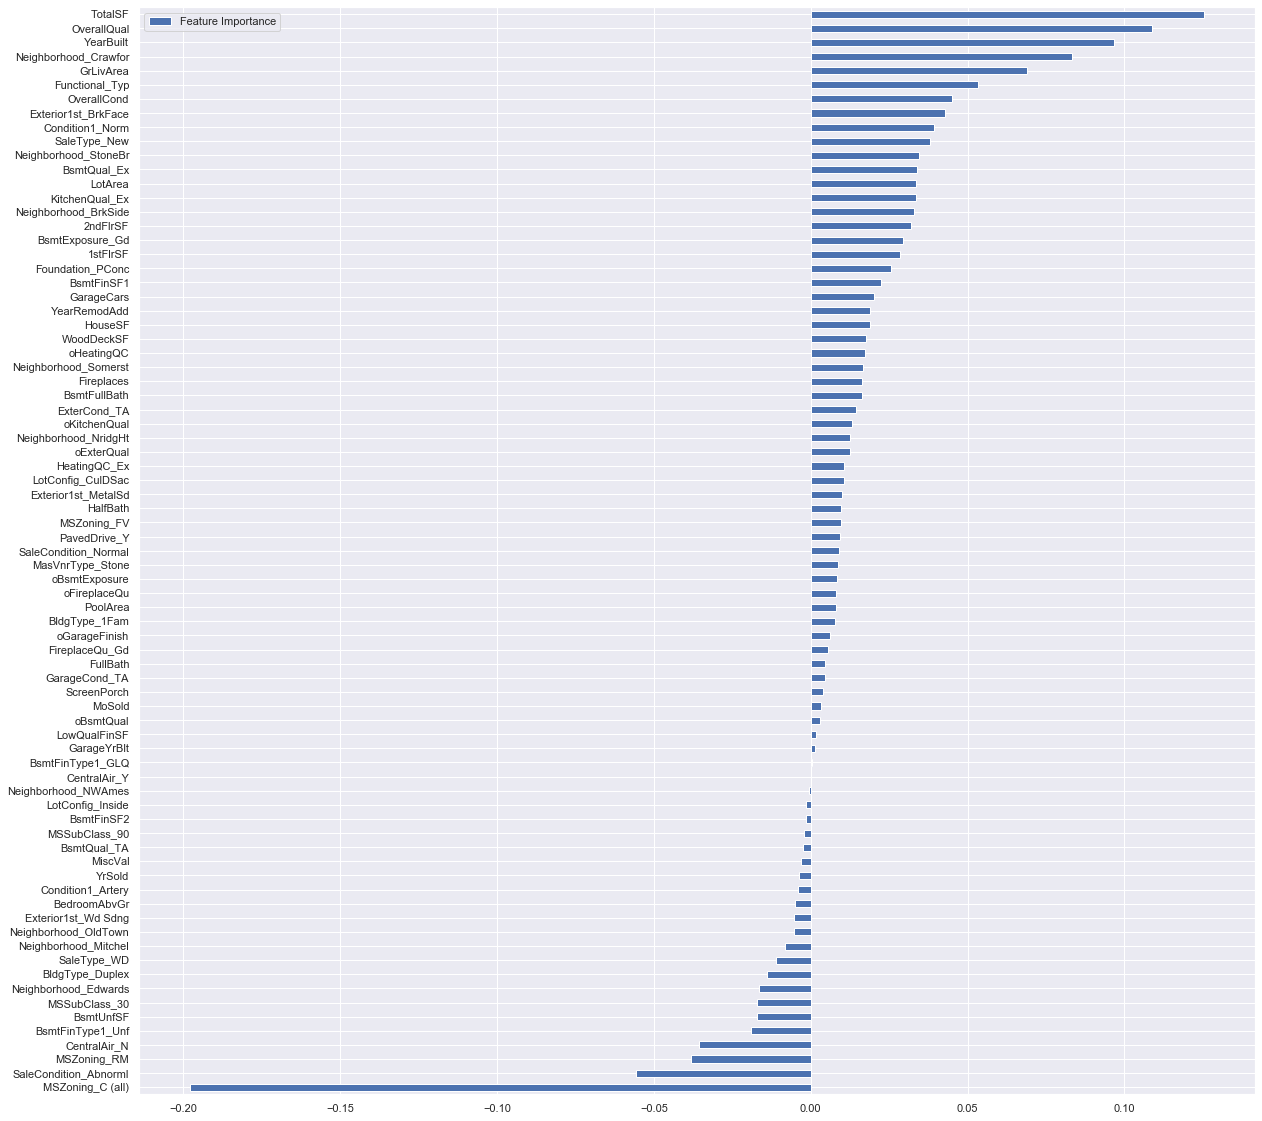

In [46]:
# Plot features by importance (feature coefficient in the model)
lasso_coeff[lasso_coeff['Feature Importance'] != 0].sort_values('Feature Importance').plot(kind='barh',figsize=(20,20))

## 12) Principal Components Analysis

Principal Components Analysis (PCA) is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.

In [47]:
from sklearn.decomposition import PCA

# Concatenate the training and test datasets into a single dataframe
data_full_2 = np.concatenate([X_train_scaled, X_test_scaled])

# Choose the number of principle components such that 95% of the variance is retained
pca = PCA(0.95)
data_full_2 = pca.fit_transform(data_full_2)

var_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Principal Component Analysis of data
print(var_PCA)

[17.6  8.9  7.5  5.4  4.5  4.1  3.5  2.9  2.6  2.4  1.9  1.6  1.5  1.4
  1.2  1.2  1.1  1.1  1.   0.9  0.9  0.9  0.8  0.8  0.7  0.7  0.7  0.6
  0.6  0.6  0.6  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4
  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1]


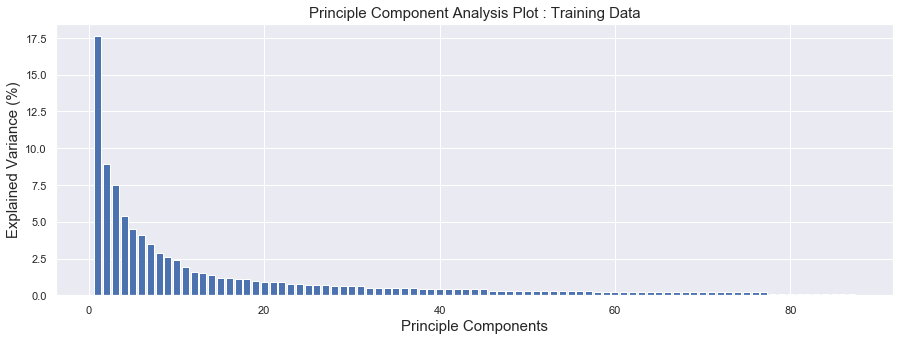

In [48]:
# Principal Component Analysis plot of the data
plt.figure(figsize=(15,5))

plt.bar(x=range(1, len(var_PCA) + 1), height=var_PCA)
plt.ylabel("Explained Variance (%)", size=15)
plt.xlabel("Principle Components", size=15)
plt.title("Principle Component Analysis Plot : Training Data", size=15)
plt.show()

In [49]:
# Shape of final data we will be working on
X_train_scaled = data_full_2[:train_data.shape[0]]

X_test_scaled = data_full_2[train_data.shape[0]:]

X_train_scaled.shape, y_train_transformed.shape, X_test_scaled.shape

((1458, 87), (1458,), (1459, 87))

## 13) Testing Different Models
It's time to test different models to see which one performs the best.
The models we will be testing are : 
- Linear Regression
- Support Vector Regression
- Stochastic Gradient Descent
- Gradient boosting tree
- Random forest
- Lasso regression
- Ridge regression
- Elastic net regularization
- Extra trees regression

In [50]:
# Importing the models
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, SGDRegressor, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import LinearSVR, SVR

# kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


#alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
#alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
#e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
#e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]


# Adicionar RidgeCV(alpha=alphas_alt, cv=kfolds)
# Adicionar LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds)
# Adicionar ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio)
# Adicionar SVR(C= 20, epsilon= 0.008, gamma=0.0003,)
# Adicionar GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)
# Adicionar LGBMRegressor(objective='regression', num_leaves=4, learning_rate=0.01, n_estimators=5000, max_bin=200, bagging_fraction=0.75, bagging_freq=5, bagging_seed=7, feature_fraction=0.2,
# feature_fraction_seed=7, verbose=-1,)

# Adicionar XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                    # max_depth=3, min_child_weight=0,
                                    # gamma=0, subsample=0.7,
                                    # colsample_bytree=0.7,
                                    # objective='reg:linear', nthread=-1,
                                    # scale_pos_weight=1, seed=27,
                                    # reg_alpha=0.00006)
                        
# StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                               # meta_regressor=xgboost,
                               # use_features_in_secondary=True)
                        
# Creating the models
models = [LinearRegression(), 
          SVR(),
          SGDRegressor(),
          SGDRegressor(max_iter=1000, tol=1e-3),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          Lasso(),
          Lasso(alpha=0.01, max_iter=10000),
          Ridge(),
          BayesianRidge(),
          KernelRidge(),
          KernelRidge(alpha=0.6, kernel='polynomial',degree=2, coef0=2.5),
          ElasticNet(),
          ElasticNet(alpha=0.001, max_iter=10000), ExtraTreesRegressor()
         ]

names = ['Linear Regression',
         'Support Vector Regression',
         'Stochastic Gradient Descent',
         'Stochastic Gradient Descent 2',
         'Gradient Boosting Tree',
         'Random Forest',
         'Lasso Regression',
         'Lasso Regression 2',
         'Ridge Regression',
         'Bayesian Ridge Regression',
         'Kernel Ridge Regression',
         'Kernel Ridge Regression 2',
         'Elastic Net Regularization',
         'Elastic Net Regularization 2',
         'Extra Trees Regression'
        ]

In [51]:
# Define a root mean square error function
def rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [53]:
from sklearn.model_selection import GridSearchCV

class gridSearch():
    def __init__(self, model):
        self.model = model
    def grid_get(self, param_grid):
        grid_search = GridSearchCV(self.model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train_transformed)
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        
        #print(pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score']])
        print('Best Parameters: {}, \nBest Score: {}'.format(grid_search.best_params_, np.sqrt(-grid_search.best_score_)))

### 1. Kernel Ridge Regression

In [54]:
gridSearch(KernelRidge()).grid_get({'alpha':[3.5, 4, 4.5, 5, 5.5, 6, 6.5], 'kernel':["polynomial"], 'degree':[3], 'coef0':[1, 1.5, 2, 2.5, 3, 3.5]})

Best Parameters: {'alpha': 6.5, 'coef0': 2.5, 'degree': 3, 'kernel': 'polynomial'}, 
Best Score: 0.1136536825862247


### 2. Elastic Net Regularization

In [55]:
gridSearch(ElasticNet()).grid_get({'alpha':[0.006, 0.0065, 0.007, 0.0075, 0.008], 'l1_ratio':[0.070, 0.075, 0.080, 0.085, 0.09, 0.095], 'max_iter':[10000]})

Best Parameters: {'alpha': 0.006, 'l1_ratio': 0.07, 'max_iter': 10000}, 
Best Score: 0.11666756249225758


### 3. Ridge regression

In [56]:
gridSearch(Ridge()).grid_get({'alpha':[10, 20, 25, 30, 35, 40, 45, 50, 55, 57, 60, 65, 70, 75, 80, 100], 'max_iter':[10000]})

Best Parameters: {'alpha': 35, 'max_iter': 10000}, 
Best Score: 0.11611079079854686


### 4. Support vector regression

In [57]:
gridSearch(SVR()).grid_get({'C':[13, 15, 17, 19, 21], 'kernel':["rbf"], "gamma":[0.0005, 0.001, 0.002, 0.01], "epsilon":[0.01, 0.02, 0.03, 0.1]})

Best Parameters: {'C': 13, 'epsilon': 0.03, 'gamma': 0.001, 'kernel': 'rbf'}, 
Best Score: 0.11329422866814502


### 5. Lasso regression

In [58]:
gridSearch(Lasso()).grid_get({'alpha':[0.01, 0.001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009], 'max_iter':[10000]})

Best Parameters: {'alpha': 0.0004, 'max_iter': 10000}, 
Best Score: 0.11686698419833652


We see that the models perform almost the same way with a score of 0.116. Let's define these models with the their respective best hyper-parameters.

In [59]:
ker = KernelRidge(alpha=6.5, coef0=2.5, degree=3, kernel='polynomial')
ela = ElasticNet(alpha=0.007, l1_ratio=0.07, max_iter=10000)
ridge = Ridge(alpha=35, max_iter= 10000)
svr = SVR(C=13, epsilon=0.03, gamma=0.001, kernel='rbf')
lasso = Lasso(alpha=0.0006, max_iter=10000)
bay = BayesianRidge()

## 15) Making Predictions and Submission
Now it's time to make predictions and store them in a csv file with corresponding Ids. after we make prediction we need to transform them to their original shape with exponential function

In [60]:
# Create the model (Random Forest Classifier) and run with the train data
model = SVR(C=13, epsilon=0.03, gamma=0.001, kernel='rbf')
model.fit(X_train_scaled, y_train_transformed)

# Generate the predictions running the model in the test data
predictions = np.exp(model.predict(X_test_scaled))

# Create the output file 
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
